<a href="https://colab.research.google.com/github/laiscarraro/Logistic-Regression/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

## 1. Teoria

## 1.1. Introdução
A regressão logística é uma técnica de análise de interdependência entre variáveis que permite determinar a probabilidade da ocorrência de algum evento levando em consideração um conjunto de dados. A variável dependente deve ser **categórica** e o domínio do resultado da análise é o intervalo de [0,1]. A partir desse intervalo, é decidida a resposta do modelo (ex.: predizer se um e-mail é spam; 1 representa sim e 0 representa não).


## 1.2. Regressão Linear vs Regressão Logística

Na Regressão Linear, tínhamos uma variável dependente, por exemplo, Altura, e uma (ou mais) variável independente, por exemplo, Peso. Para determinar se a Altura varia de acordo com o Peso, ou seja, se essas variáveis possuem algum tipo de correlação, podemos calcular o $R^2$, calcular o *p-value* do teste de hipótese para determinar se o $R^2$ é estatisticamente significante e, por fim, utilizar uma reta, a reta ajustada, para fazer previsões com esse modelo. Para isso, utilizamos o método dos mínimos quadrados, minimizando a distância entre os pontos e a reta ajustada. Essa reta terá dois *coeficientes*, na forma: $$y = ax + b$$

Onde $y$ é a variável dependente (que será prevista), $a$ é o coeficiente de inclinação da reta, $x$ é a variável independente e $b$ é o corte no eixo $y$.


## 1.3. Regressão Logística

Agora que já relembramos o básico da Regressão Linear, podemos avançar para a Regressão Logística. Os dois modelos são muito similares, mas a Regressão Logística, ao invés de prever uma variável numérica, como na Linear, é usada para prever uma variável **categórica**. A principal implicação dessa diferença é que, ao invés de um número contínuo, como Altura, por exemplo, o modelo de Regressão Logística retorna um vetor de **probabilidades**. Uma observação importante é a de que todas as variáveis independentes aplicadas no modelo devem ser literalmente independentes, ou seja, a correlação entre todos os pares deve ser nula (os vetores devem ser ortogonais). Uma forma de resolver o problema da multicolinearidade, como já visto na disciplina, é aplicando o método estatístico de Análise de Componentes Principais.

Existem diversas formas de se utilizar a regressão logística. Na Regressão logística binária, como o próprio nome diz, o modelo retorna um valor binário para a variável dependente (ex.: se um tumor é benigno ou não). Na Regressão logística multinomial são retornados valores de 3 ou mais categorias sem nenhuma ordem em expecifico (e.g.: qual tipo de comida é mais comprada entre normal, vegetariana e vegana). Por fim, na Regressão logística ordinal são retornados valores de 3 ou mais categorias para a variável dependente, cada categoria em uma ordem expecifica (ex.: nota de um filme de 1 a 10).

Outra grande diferença entre a Regressão Logística e a Regressão Linear é a forma de como ajustamos a curva (o caso a Linear, uma reta, e no caso da Logística, uma sigmoide) aos dados. Na Linear, utilizávamos o método de mínimos quadrados para minimizar os resíduos. No entanto, não é possível calcular os resíduos de uma sigmoide, e por isso o método utilizado é o de **máxima verossimilhança**. Nele, basicamente, deve ser calculada a verossimilhança do conjunto de dados dada uma curva, o que é feito da seguinte maneira: primeiro, deve-se calcular, para cada observação, a probabilidade encontrada pelo modelo; em seguida, multiplica-se todas as probabilidades, e essa será a verossimilhança. O algoritmo para quando encontra a curva com a maior verossimilhança.

Agora, para um exemplo, vamos assumir uma variável dependente *Y* que pode apenas assumir 2 estados (1 e 0) e um conjunto de *p* variáveis independentes *X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>p</sub>*. O modelo de regressão tem a forma: $$P(Y = 1) = {1 \over 1 + e^{-g(x)}}$$


<img src="https://miro.medium.com/max/1200/1*RqXFpiNGwdiKBWyLJc_E7g.png" width= 700px aling="center"/>

Como pode ser visto, a imagem da função de regressão (*sig(t)*) é limitada entre 0 e 1. Também é importante ressaltar o valor de *g(x)* (na imagem, *t*), definido como: 

$$g(x) = B_0+B_1 X_1+...+B_p X_p$$

Os coeficientes *B<sub>0</sub>, B<sub>1</sub>, ..., B<sub>p</sub>* são estimados a partir do conjunto dados, pelo
método da máxima verossimilhança, como já mencionado.

Conseguimos na Regressão Logística, também, prever os coeficientes da nossa "curva" ajustada. Para isso, devemos aplicar ao nosso vetor de probabilidades (eixo y) uma *transformação*, seja pela função **logit** ou pela **probit**. A função logit e a probit tem as formas respectivamente: $$logit = log({p \over 1 - p}) \hspace{1cm} probit =\phi^{-1}(p)$$

Onde *p* é a probabilidade do ensaio de Bernoulli de a variável dependente assumir o valor 1. A função probit, por sua vez, utiliza uma função normal inversa: ao invés de pegar um ponto da curva normal, que tem um domínio irrestrito, e encontrar na tabela de *z-scores* um valor correspondente de 0 a 1, fazemos o contrário; pegamos um valor que vai de 0 a 1 e o transformamos num valor com domínio irrestrito. Na prática, a logit e a probit têm o mesmo efeito e quase não afetam o modelo.

Ao aplicar uma dessas transformações, a função passa para o formato de uma reta. A partir daí, podemos conseguir os coeficientes e gerar uma "fórmula" para o modelo de previsão.

Por fim, para testar se uma variável (ou **feature**) de nosso modelo é estatisticamente significante, analisamos se a sua inclusão gera uma mudança significativamente maior do que 0. Para isso, utilizamos um testa chamado *Teste de Wald*.

## 1.4. Testes

Para este projeto foi utilizado um dos testes mais utilizados para a validação de modelos de regressão logística: O *Teste de Wald*.

## Teste de Wald
O teste de Wald tem como objetivo observar a regressão como um todo e decidir se uma variável ou coeficiente é tão significativo quanto zero. Basicamente, um coeficiente é considerado significativo quando o teste rejeita a hipótese nula de que ele tem o valor 0.

Sendo assim, a definição da equação utilizada para um coeficiente *B<sub>i</sub>* qualquer em uma equação com *p* termos, onde *p* ∈ ℕ\*, e *i < p*:$$Wald = {B_{i} \over SE(B_{i})}$$

Onde o *SE(B<sub>i</sub>) é o erro estatístico para um dado coeficiente *B<sub>i</sub>*.

## 1.5. Implementação

Abaixo, segue a implementação de um modelo de Regressão Logística num conjunto de dados sobre automóveis.

In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import cross_val_score

uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['auto-mpg1.csv']))

# alteramos o atributo mpg para se este é maior ou igual que 23 ou não
data['mpg'] = data['mpg'].apply(lambda x: 1 if x>=23.0 else 0)

data.head(10)

Saving auto-mpg1.csv to auto-mpg1 (1).csv


,mpg,cilindros,cilindradas,cavalos,peso,aceleração,ano,origem,nome
0,0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,0,8,302.0,140,3449,10.5,70,1,ford torino
5,0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [0]:
# removemos entradas desconhecidas
data.replace('?', np.nan, inplace=True)
data = data.dropna()

# colunas relevantes, sem coluna de nomes
cols = ['cilindros', 'cilindradas', 'cavalos', 'peso', 'aceleração', 'ano', 'origem']

#returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(data[cols].values)
data_norm = pd.DataFrame(x_scaled, columns = cols)

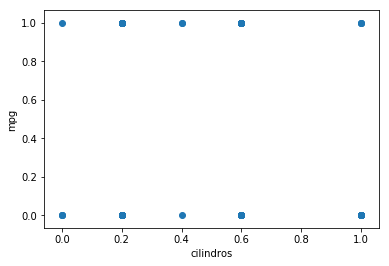

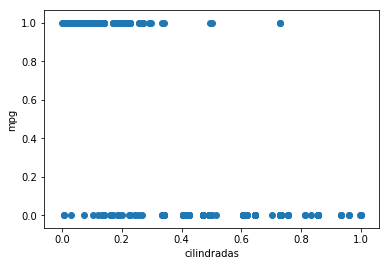

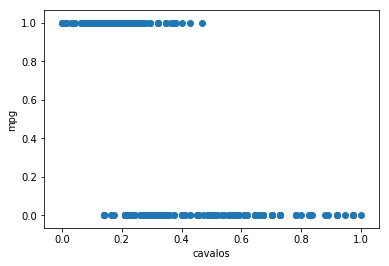

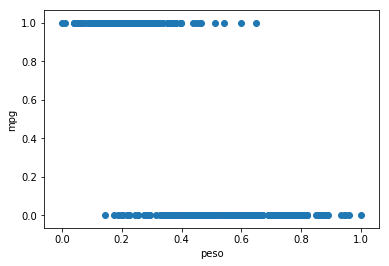

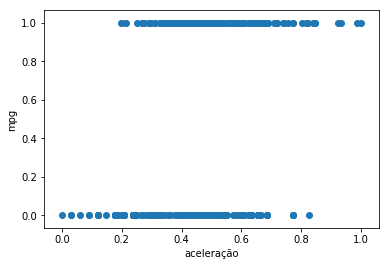

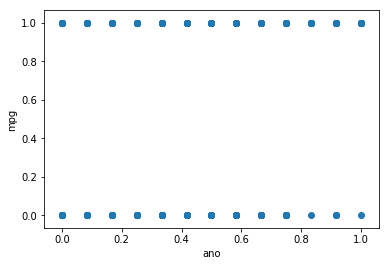

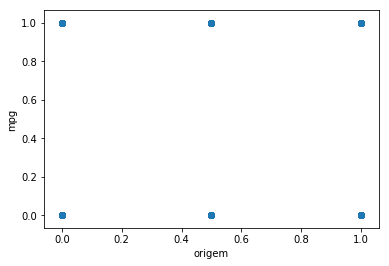

In [0]:
#Scatter plots
for col in data_norm.columns:
  plt.scatter(data_norm[col], data['mpg'])
  plt.xlabel(col)
  plt.ylabel('mpg')
  plt.show()

In [0]:
#%%

# X são as variáveis independentes, y é a variável dependente
X = data[cols]
y = data['mpg']

# Teste chi-quadrado para verificar importância dos atributos
from sklearn.feature_selection import chi2
chi2val, pval = chi2(X, y)
print("Chi-squared: ", chi2val)
print("P-values: ", pval)

# dividimos algumas entradas para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# aplicamos modelo de regressão logística
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# resultados do modelo
Ptrain = logreg.predict(X_train)
Ptest = logreg.predict(X_test)

# vetor de probabilidades 
probability_test = logreg.predict_proba(X_test)
probability_train = logreg.predict_proba(X_train)

Chi-squared:  [1.19836364e+02 1.25032219e+04 2.46734479e+03 5.44000454e+04
 2.30335774e+01 1.29062584e+01 4.24660194e+01]
P-values:  [6.87002984e-28 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.59196561e-06 3.27485284e-04 7.19209350e-11]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       142
           1       0.91      0.94      0.93       132

    accuracy                           0.93       274
   macro avg       0.93      0.93      0.93       274
weighted avg       0.93      0.93      0.93       274

              precision    recall  f1-score   support

           0       0.88      0.83      0.86        54
           1       0.87      0.91      0.89        64

    accuracy                           0.87       118
   macro avg       0.87      0.87      0.87       118
weighted avg       0.87      0.87      0.87       118

Score:  0.8728813559322034
Confusion Matrix:  [[45  9]
 [ 6 58]]


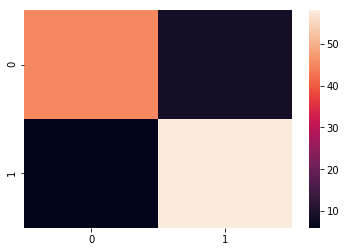

Accuracy:  0.8728813559322034
Cross-Validation:  [0.925      0.875      0.9        0.95       0.85       0.9
 0.97368421 0.92105263 0.84210526 0.84210526]
Cross-Validation mean:  0.8978947368421053


In [0]:
# testando o modelo 
print(classification_report(y_train, Ptrain))
print(classification_report(y_test, Ptest))

%matplotlib inline

# calculando o score da predição
score = logreg.score(X_test,y_test)
print('Score: ', score)

# Testando valores específicos no modelo com a confusion matrix
cf = confusion_matrix(y_test, Ptest)
accuracy = accuracy_score(y_test, Ptest)
print("Confusion Matrix: ", cf)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,Ptest)))
plt.show()
print("Accuracy: ", accuracy)


# Cross-validation
from sklearn.preprocessing import StandardScaler
cross_val = cross_val_score(LogisticRegression(solver='liblinear'), X,y, scoring='accuracy', cv=10)
print('Cross-Validation: ', cross_val)
print('Cross-Validation mean: ', cross_val.mean())
# normalizando X_test
df_norm = pd.DataFrame(StandardScaler().fit_transform(X_test))



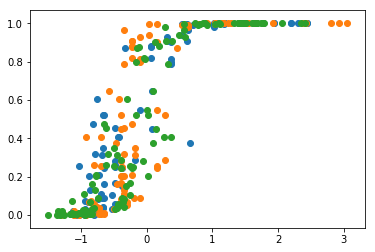

In [0]:
# probabilidade de ser 1
probability_test_df = pd.DataFrame(probability_test)
probability_t = pd.DataFrame(probability_test_df[0])

# plotando o gráfico de probabilidades e colunas

plt.scatter(df_norm[1], probability_test_df[0])
plt.scatter(df_norm[2], probability_test_df[0])
plt.scatter(df_norm[3], probability_test_df[0])

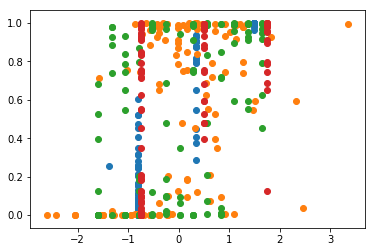

In [0]:
# variaveis que podem ser desprezadas pro modelo

plt.scatter(df_norm[0],probability_test_df[0])
plt.scatter(df_norm[4],probability_test_df[1])
plt.scatter(df_norm[5],probability_test_df[1])
plt.scatter(df_norm[6],probability_test_df[1])


In [0]:
# coefiencientes da reta de odds usando função logit
logreg.coef_


array([[-0.22891855, -0.00466729, -0.05623   , -0.00322998, -0.19088155,
         0.25420821,  0.05010316]])

In [0]:
# Leave-one-out Cross-validation
# também conhecido como teste de jackknife
# (reamostragem por retirar uma observação)

from sklearn.model_selection import LeaveOneOut, cross_val_score
loo = LeaveOneOut()
scores = cross_val_score(logreg, X_test, y_test, cv=loo)

# precisão do modelo e o intervalo de confiança
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 1.96))

# notamos que leave-one-out/jackknife é um estimador que resulta em uma grande variância
# https://scikit-learn.org/stable/modules/cross_validation.html#leave-one-out-loo
# "In terms of accuracy, LOO often results in high variance as an estimator for the test error."


Accuracy: 0.89 (+/- 0.61)


In [0]:
# isolamos apenas os atributos relevantes para o modelo
cols = ['cilindradas', 'cavalos', 'peso']

# reaplicamos o modelo com o dataset reduzido
X = data[cols]

# dividimos algumas entradas para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# aplicamos modelo de regressão logística
logreg = LogisticRegression(solver='liblinear')
logreg.fit(X_train, y_train)

# resultados do modelo
Ptrain = logreg.predict(X_train)
Ptest = logreg.predict(X_test)

# vetor de probabilidades 
probability_test = logreg.predict_proba(X_test)
probability_train = logreg.predict_proba(X_train)

# testando o modelo 
print(classification_report(y_train, Ptrain))
print(classification_report(y_test, Ptest))

# reaplicamos teste jackknife
scores = cross_val_score(logreg, X_test, y_test, cv=loo)

# precisão do modelo e o intervalo de confiança
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 1.96))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       142
           1       0.86      0.96      0.91       132

    accuracy                           0.91       274
   macro avg       0.91      0.91      0.91       274
weighted avg       0.91      0.91      0.90       274

              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.85      0.91      0.88        64

    accuracy                           0.86       118
   macro avg       0.87      0.86      0.86       118
weighted avg       0.87      0.86      0.86       118

Accuracy: 0.85 (+/- 0.70)
